In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [112]:
sns.set_style("dark")
sns.set(font_scale=1.5)  # crazy big

In [113]:
race_percentages_df = pd.read_csv('racePercentages.csv')
race_percentages_df.drop( race_percentages_df[race_percentages_df['Location'] == 'Puerto Rico'].index, inplace=True)

In [114]:
shootings_df = pd.read_csv('PoliceShootings.csv')
states_namesAndCodes = pd.read_csv('us_codes.csv')

## Replace states names with their codes

In [115]:
dic = states_namesAndCodes.set_index('State').to_dict()

In [116]:
race_percentages_df['Location'] = race_percentages_df['Location'][1:].map(dic['Code'])

## Modify somethings in the shootings dataFrame

### Extract the Month and Year values to seperate columns

In [117]:
shootings_df['Month']  = shootings_df.apply(lambda row : row['date'].split('/')[1], axis=1)
shootings_df['Year'] = shootings_df.apply(lambda row : row['date'].split('/')[2], axis=1)

### Drop unnecessary columns

In [118]:
shootings_df.drop(['date', 'city', 'name', 'id'], axis=1, inplace=True)

### Drop unnecessary rows

In [119]:
shootings_df = shootings_df.drop( shootings_df[shootings_df['race'] == 'Other'].index )

## Visualize

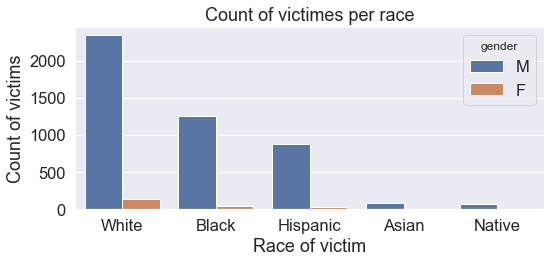

In [120]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="race", hue="gender",data=shootings_df, order=["White", "Black", "Hispanic", "Asian", "Native"])
ax.set(ylabel="Count of victims", xlabel="Race of victim", title="Count of victimes per race")
plt.tight_layout()

### However we need to take into consideration the population percentages by race

#### according to https://www.census.gov/quickfacts/fact/table/US/PST045219

In [121]:
total_population_of_us = 328239523

In [122]:
population_by_race = race_percentages_df.iloc[0][1:].apply(lambda x : int(float(x) * 328239523))

In [123]:
count_of_shootings_in_million_by_race = ((shootings_df.groupby('race').size() * 1000000 ) / population_by_race).apply(lambda x:int(x))

In [124]:
count_of_shootings_in_million_by_race_df = pd.DataFrame({'race':count_of_shootings_in_million_by_race.index, 'inMillionCount':count_of_shootings_in_million_by_race.values})
count_of_shootings_in_million_by_race_df = count_of_shootings_in_million_by_race_df.sort_values("inMillionCount").reset_index(drop=True)

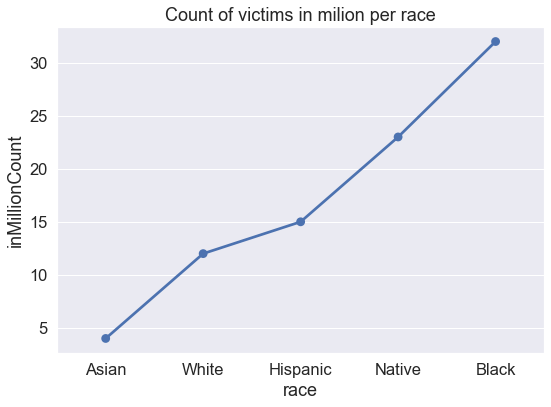

In [125]:
plt.figure(figsize=(8, 6))
ax = sns.pointplot(x="race", y="inMillionCount", data=count_of_shootings_in_million_by_race_df)
ax.set(title="Count of victims in milion per race")
plt.tight_layout()

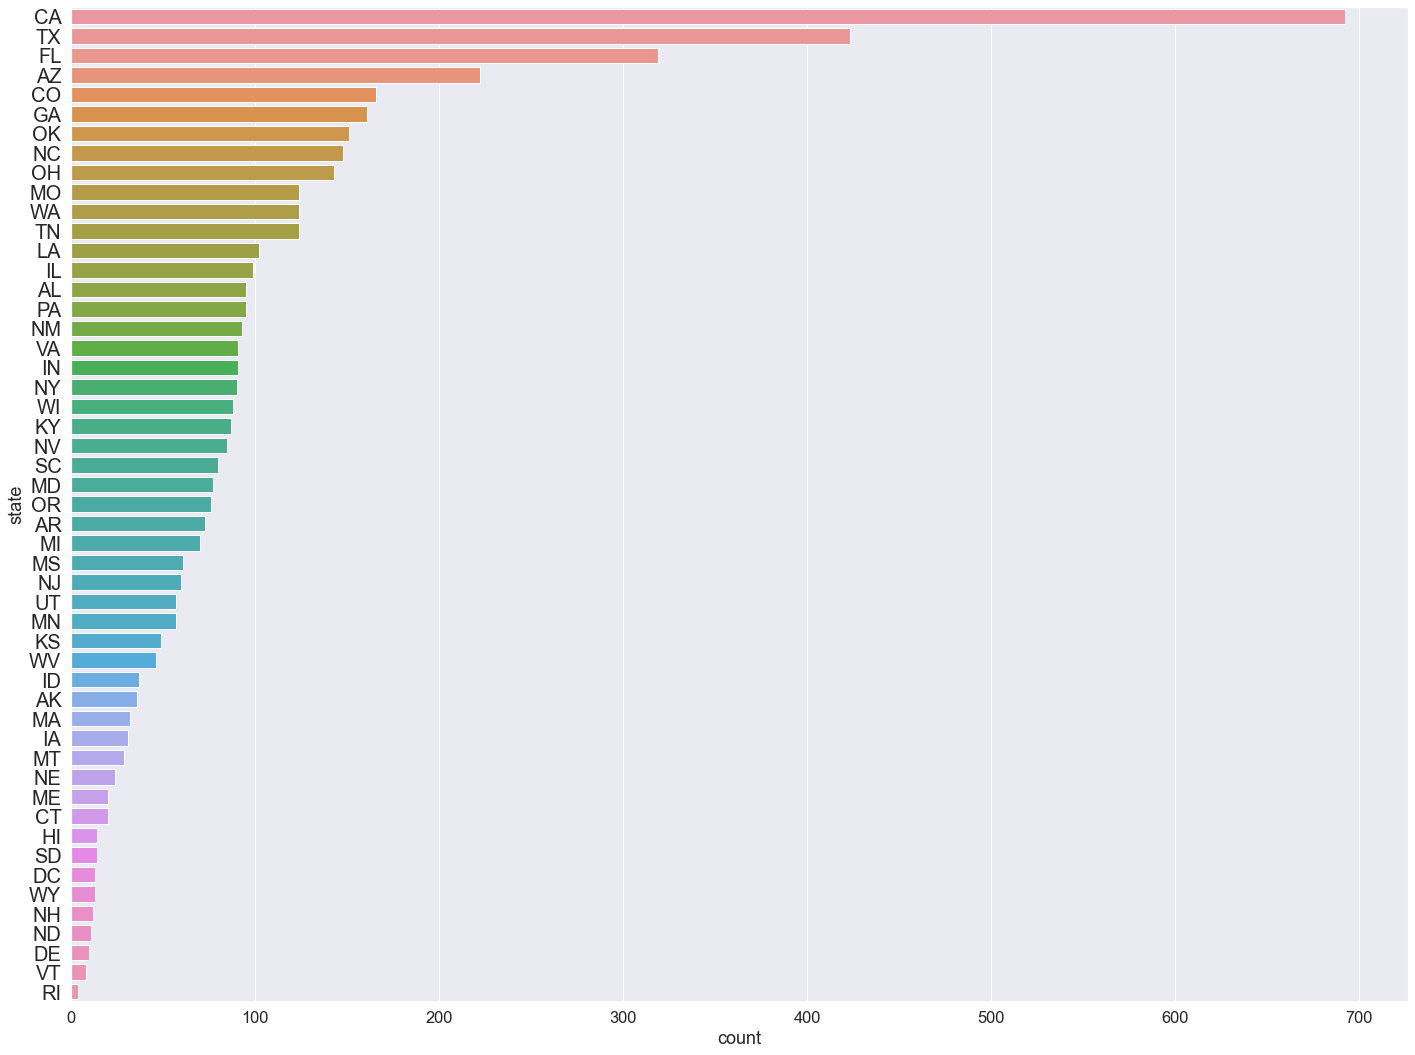

In [126]:
plt.figure(figsize=(20,15))
ax = sns.countplot(y="state", data=shootings_df, orient="h", order= shootings_df['state'].value_counts().index)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


plt.tight_layout()

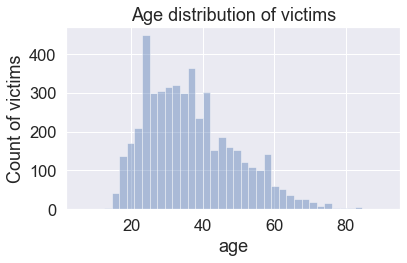

In [127]:
ax = sns.distplot(shootings_df['age'], kde=False)
ax.set(title="Age distribution of victims", ylabel="Count of victims")
plt.tight_layout()

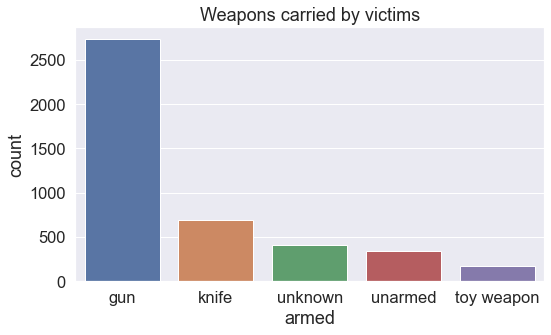

In [131]:
plt.figure(figsize=(8, 5))
order = shootings_df['armed'].value_counts()[:5].index
ax= sns.countplot(x='armed',data=shootings_df, orient="h",  order= order)
ax.set(title="Weapons carried by victims")
plt.tight_layout()

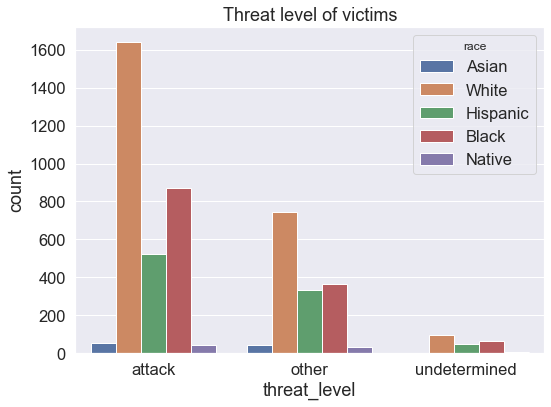

In [132]:
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='threat_level',data=shootings_df, orient="h", hue="race")
ax.set(title="Threat level of victims")
plt.tight_layout()